In [92]:
import os
import numpy as np
import cv2
import PIL
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib

In [93]:
IMG_WIDTH, IMG_HEIGHT = 316, 316

In [94]:
loaded_model = tf.keras.models.load_model('models/cnn_with_fft.h5')
scaler = joblib.load('models/scaler.bin')

C:\Users\vladi\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [95]:
fft_inv_images = []
inv_names = sorted([file for file in os.listdir('data/invoices_rotated/images')])
for file_name in inv_names:
    image = cv2.imread(os.path.join('data/invoices_rotated/images', file_name), cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))

    # COMPUTING FFT
    f = cv2.dft(np.float32(image))
    fshift = np.fft.fftshift(f)
    f_abs = np.abs(fshift) + 1.0
    f_img = 20 * np.log(f_abs)
    
    fft_inv_images.append(f_img)

fft_inv_images = np.array(fft_inv_images)
fft_inv_images = fft_inv_images.reshape(len(fft_inv_images), IMG_HEIGHT, IMG_WIDTH, 1)
fft_inv_images /= 255

angle_predictions = loaded_model.predict(fft_inv_images)
real_angles = scaler.inverse_transform(angle_predictions)
real_angles


1/1 [==============================] - 2s 2s/step


array([[ 8.62067   ],
       [ 8.267031  ],
       [ 9.330763  ],
       [ 1.8436933 ],
       [ 0.19146079],
       [ 6.7816663 ],
       [ 5.280311  ],
       [11.476494  ],
       [ 9.046117  ],
       [ 9.297457  ],
       [ 4.3952384 ]], dtype=float32)

C:\Users\vladi\AppData\Local\Temp\ipykernel_7468\2560861498.py:2: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  rotated_images = [original_images[i].rotate(-real_angles[i], PIL.Image.NEAREST, expand = 1, fillcolor = 'white')


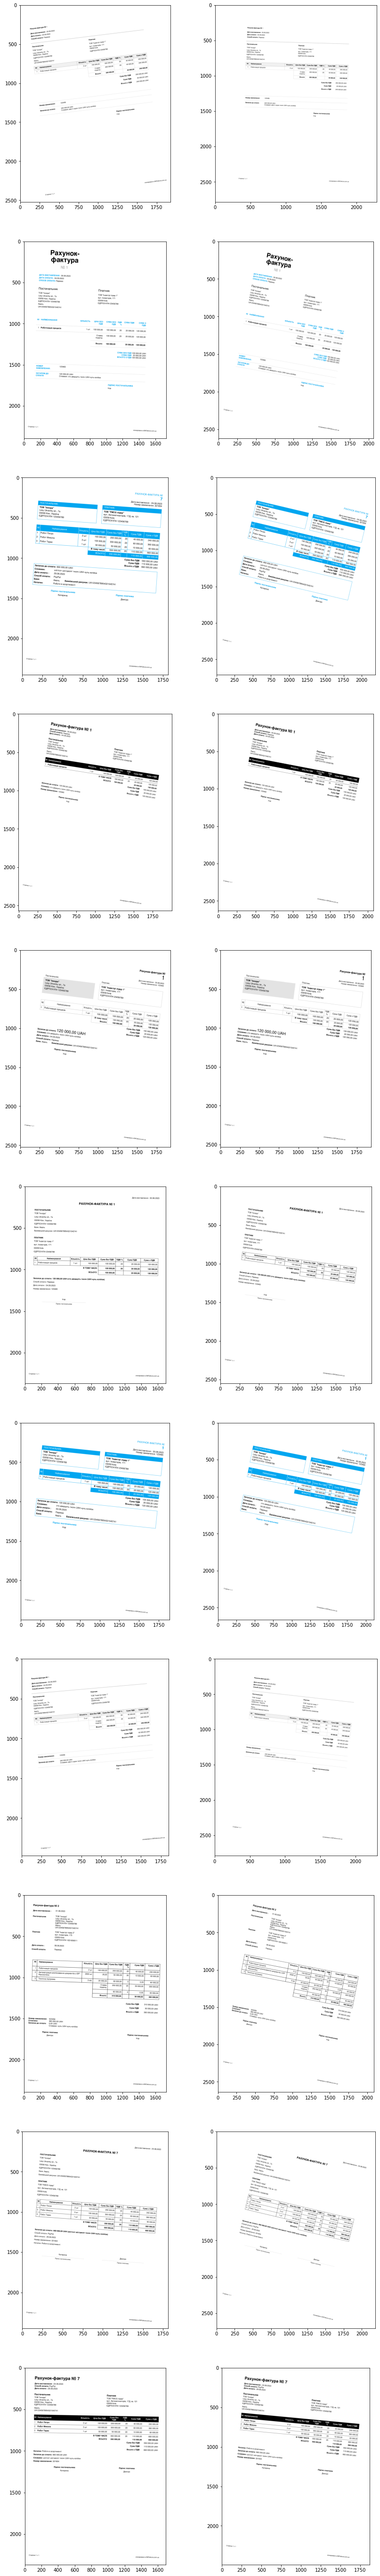

In [96]:

original_images = [Image.open(os.path.join('data/invoices_rotated/images', file_name)) for file_name in inv_names]
rotated_images = [original_images[i].rotate(-real_angles[i], PIL.Image.NEAREST, expand = 1, fillcolor = 'white')
                   for i in range(len(original_images))]

f, axarr = plt.subplots(11,2, figsize=(14,100))
for i in range(11):
    axarr[i,0].imshow(original_images[i], cmap = 'gray')
    axarr[i,1].imshow(rotated_images[i], cmap = 'gray')